<a href="https://colab.research.google.com/github/ThanapolKhamhla/Grovers-algorithm/blob/main/Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm Training in SCQC2024

In [1]:
!pip install -U qiskit qiskit[visualization] qiskit-ibm-runtime qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 251.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
  Installing bu

In [2]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

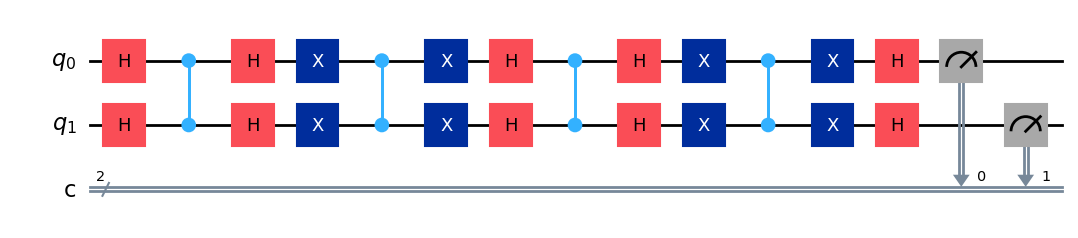

In [3]:
# Set up the quantum circuit
num_qubits = 2
grover = QuantumCircuit(num_qubits, num_qubits)

# Step 1: Initialization - Apply Hadamard gates to all qubits
for bit in range(num_qubits):
  grover.h(bit)

# Step 2: Build the oracle
def oracle(bits)->list:
  grover.cz(bits[0],bits[1]) #mark |11>

# Step 3: Construct the diffusion operator
def diffuser(bits)->list:
  grover.h([bits[0],bits[1]])
  grover.x([bits[0],bits[1]])
  grover.cz(bits[0],bits[1])
  grover.x([bits[0],bits[1]])
  grover.h([bits[0],bits[1]])

# Step 4: Run the algorithm iteratively
iter = 2
for i in range(iter):
  oracle((0,1))
  diffuser((0,1))

# Step 5: Measure the results
grover.measure([0,1],[0,1])

grover.draw('mpl')

In [4]:
# execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
print(counts)

{'11': 256, '01': 270, '00': 245, '10': 229}


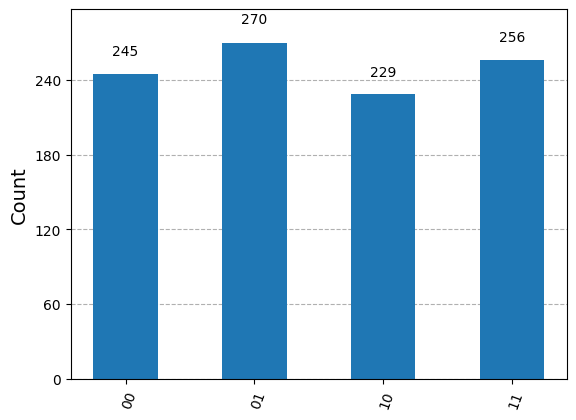

In [5]:
plot_histogram(counts)

# Challenge Problem
ให้สร้าง Grover's algorithm สำหรับ marked state $|111⟩$

In [75]:
# Step 1: Initialization - Apply Hadamard gates to all qubits
def init(num_qubits)->int:

  bits = [i for i in range(num_qubits)]
  for bit in range(num_qubits):
    grover.h(bit)

# Step 2: Build the oracle #mark |111>
def oracle(bits, mark)->(list,list):
  if mark == [0,0,0]:
    grover.x([bits[i] for i in range(num_qubits)])
    grover.ccz(bits[0], bits[1], bits[2])
    grover.x([bits[i] for i in range(num_qubits)])
  if mark == [1,1,1]:
    grover.ccz(bits[0], bits[1], bits[2])

# Step 3: Construct the diffusion operator
def diffuser(bits)->list:
  grover.h([bits[i] for i in range(num_qubits)])
  grover.x([bits[i] for i in range(num_qubits)])
  grover.ccz(bits[0], bits[1], bits[2])
  grover.x([bits[i] for i in range(num_qubits)])
  grover.h([bits[i] for i in range(num_qubits)])

# Step 4: Run the algorithm iteratively
def iter_run(iter)->int:

  for i in range(iter):
    oracle(bits, mark)
    diffuser(bits)

# Step 5: Measure the results
def measure_all(bits)->list:
  grover.measure(bits, bits)






Mark, [1, 1, 1]


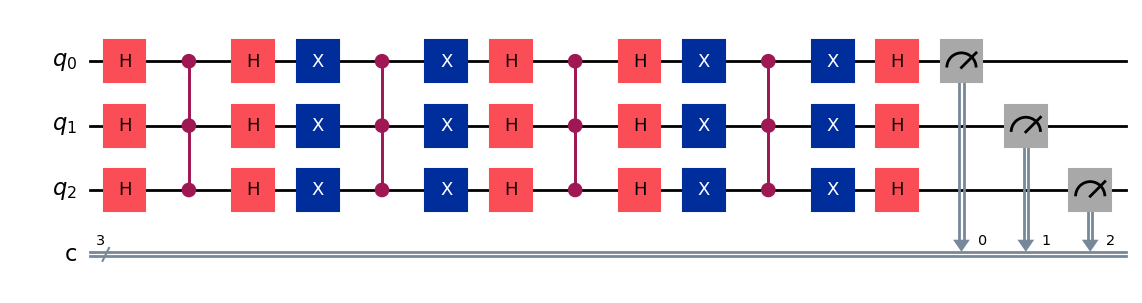

In [76]:
# Set up the quantum circuit
num_qubits = 3
iter = 2
mark = [1,1,1]

grover = QuantumCircuit(num_qubits, num_qubits)
init(num_qubits)
iter_run(iter)
measure_all(bits)
print(f"Mark, {mark}")
grover.draw('mpl')



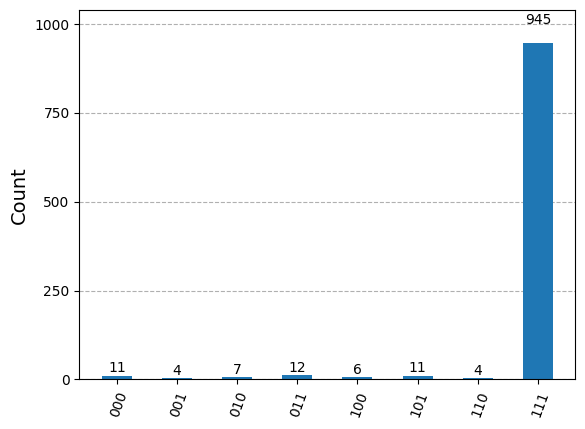

In [77]:
# execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
plot_histogram(counts)

# Mark multiple states

Mark, [[0, 0, 0], [1, 0, 1]]


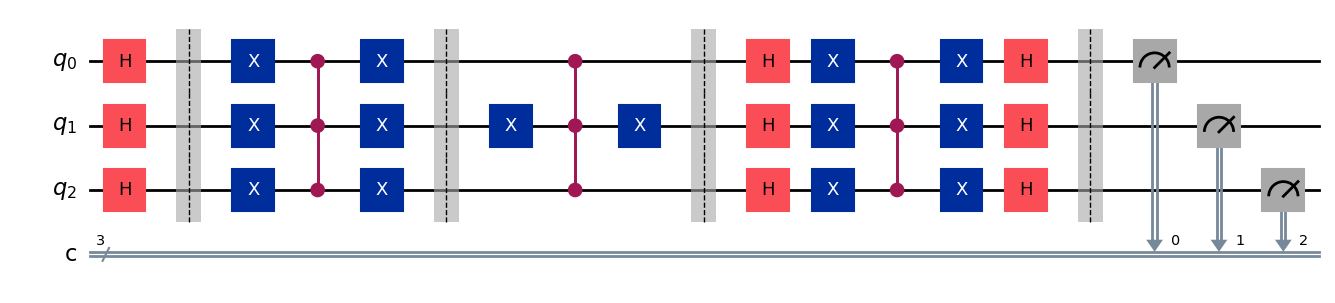

In [128]:
# Step 1: Initialization - Apply Hadamard gates to all qubits
def init(num_qubits)->int:

  bits = [i for i in range(num_qubits)]
  for bit in range(num_qubits):
    grover.h(bit)

# Step 2: Build the oracle #mark |111>
def oracle(bits, marks)->(list, list):
  for i, mark in enumerate(marks):
    if mark == [0,0,0]:
      grover.barrier()
      grover.x([bits[i] for i in range(num_qubits)])
      grover.ccz(bits[0], bits[1], bits[2])
      grover.x([bits[i] for i in range(num_qubits)])

    elif mark == [0,0,1]:
      grover.barrier()
      grover.x([bits[1], bits[2]])
      grover.ccz(bits[0], bits[1], bits[2])
      grover.x([bits[1], bits[2]])

    elif mark == [0,1,0]:
      grover.barrier()
      grover.x([bits[0], bits[2]])
      grover.ccz(bits[0], bits[1], bits[2])
      grover.x([bits[0], bits[2]])

    elif mark == [0,1,1]:
      grover.barrier()
      grover.x(bits[2])
      grover.ccz(bits[0], bits[1], bits[2])
      grover.x(bits[2])

    elif mark == [1,0,0]:
      grover.barrier()
      grover.x([bits[0], bits[1]])
      grover.ccz(bits[0], bits[1], bits[2])
      grover.x([bits[0], bits[1]])

    elif mark == [1,0,1]:
      grover.barrier()
      grover.x([bits[1]])
      grover.ccz(bits[0], bits[1], bits[2])
      grover.x([bits[1]])

    elif mark == [1,1,0]:
      grover.barrier()
      grover.x([bits[0]])
      grover.ccz(bits[0], bits[1], bits[2])

    elif mark == [1,1,1]:
      grover.barrier()
      grover.ccz(bits[0], bits[1], bits[2])

# Step 3: Construct the diffusion operator
def diffuser(bits)->list:
  grover.barrier()
  grover.h([bits[i] for i in range(num_qubits)])
  grover.x([bits[i] for i in range(num_qubits)])
  grover.ccz(bits[0], bits[1], bits[2])
  grover.x([bits[i] for i in range(num_qubits)])
  grover.h([bits[i] for i in range(num_qubits)])

# Step 4: Run the algorithm iteratively
def iter_run(iter)->int:
  for i in range(iter):
    oracle(bits, mark)
    diffuser(bits)

# Step 5: Measure the results
def measure_all(bits)->list:
  grover.barrier()
  grover.measure(bits, bits)

# Set up the quantum circuit
num_qubits = 3
iter = 1
mark = [[0,0,0], [1,0,1]]


grover = QuantumCircuit(num_qubits, num_qubits)
init(num_qubits)
iter_run(iter)
measure_all(bits)
print(f"Mark, {mark}")
grover.draw('mpl')


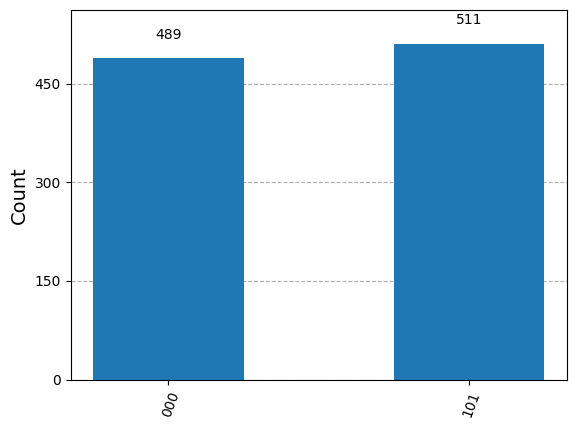

In [155]:
# execute the quantum circuit
shot = 1000
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=shot).result()
counts = result.get_counts(grover)
plot_histogram(counts)


500.0